## Переобучение. Регуляризация

1) отобрать только лучшие фичи
2) контролировать "размер" весов модели, чтобы модель не переобучалась - **регуляризация**

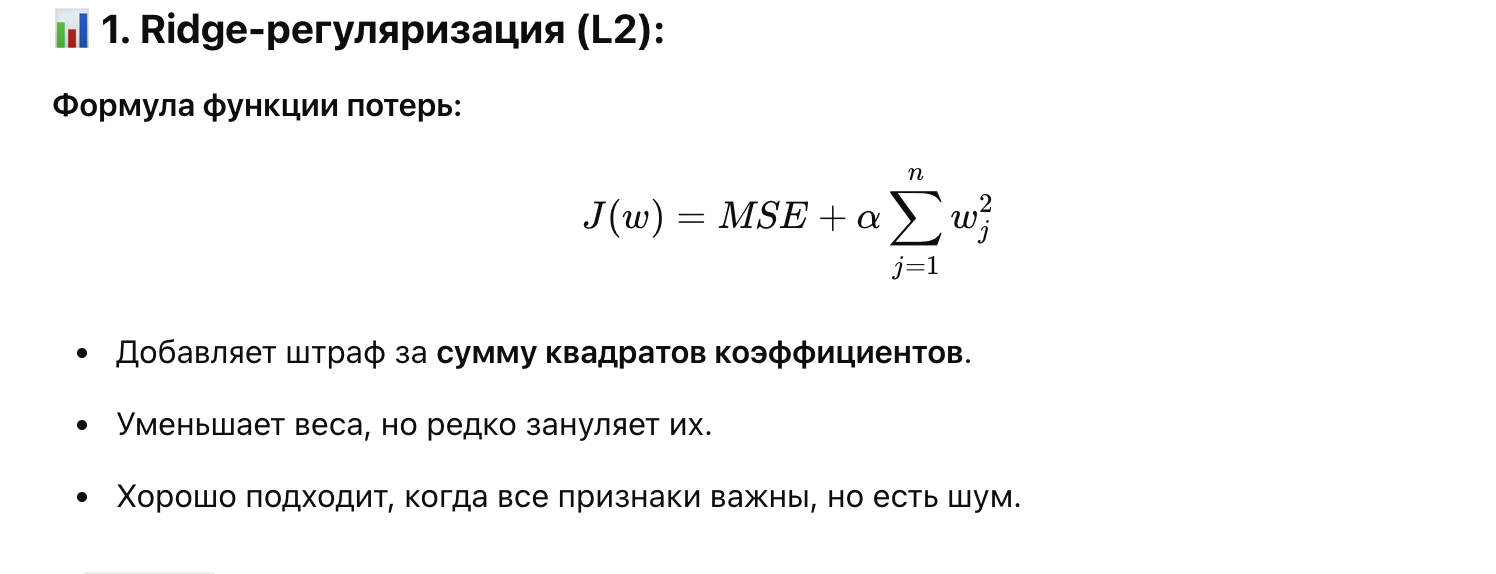

In [1]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=1.0)  # alpha — сила регуляризации
model.fit(X_train, y_train)

NameError: name 'X_train' is not defined

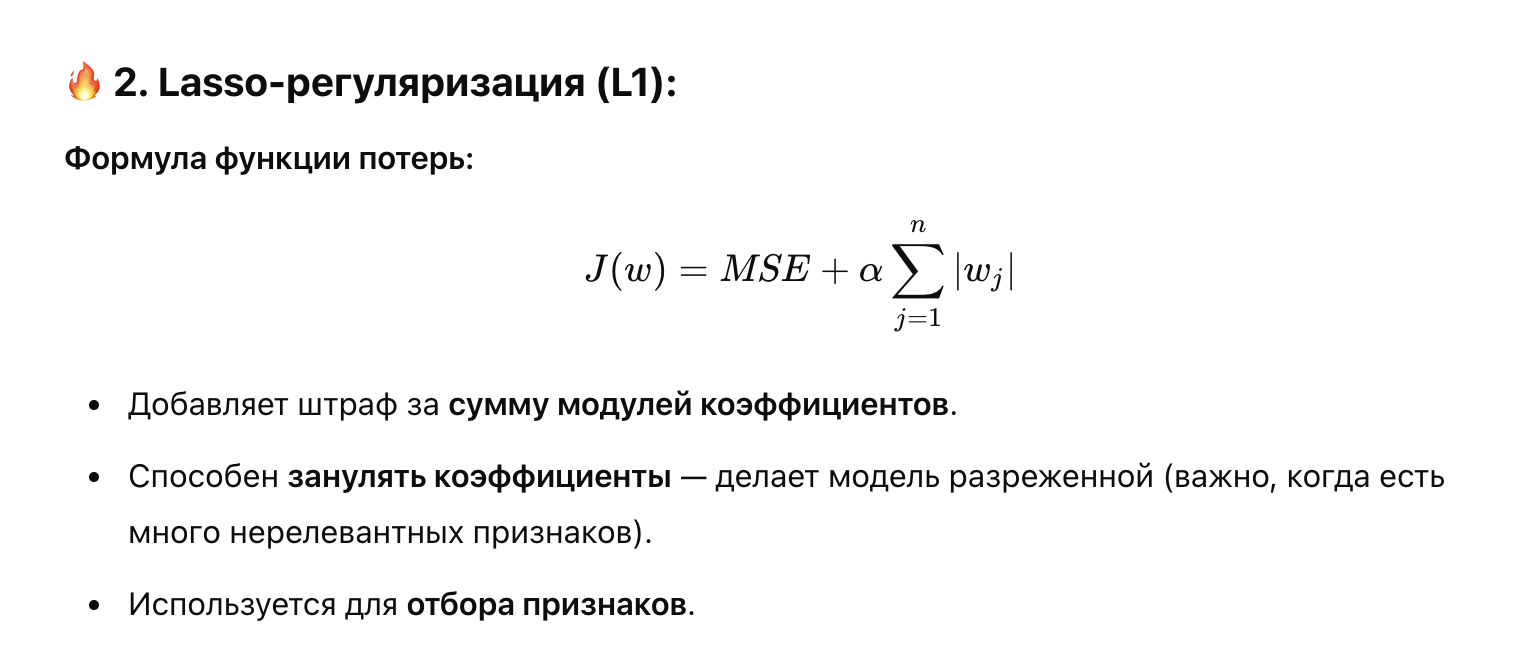

In [ ]:
from sklearn.linear_model import Lasso

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

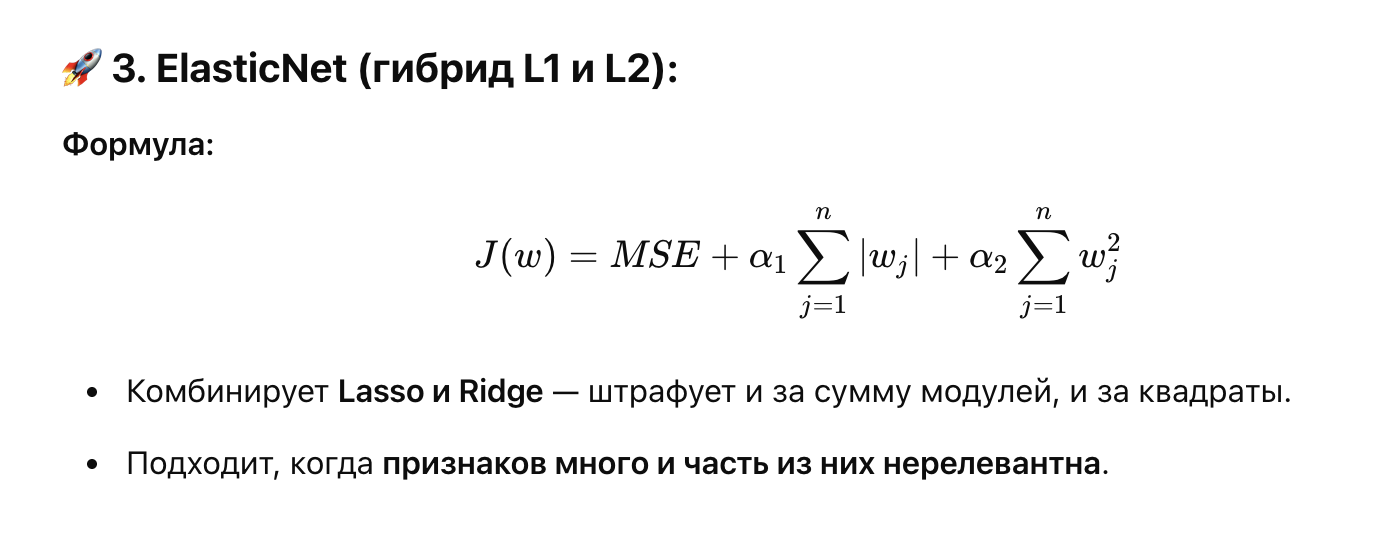

In [ ]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.5)  # l1_ratio — баланс между L1 и L2
model.fit(X_train, y_train)

# l1_ratio=1 — это Lasso.
# l1_ratio=0 — это Ridge

# В sklearn есть RidgeCV и LassoCV — они сами подбирают alpha.

## Нормализация

Когда несколько фич - нужно нормализовать х

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(), LinearRegression())
model.fit(X, y)

# MinMaxScaler для приведения данных к диапазону [0, 1]
# StandardScaler для Z-нормализации (централизует к среднему 0 и масштабу 1)
# Normalizer для нормализации строк данных по L1 или L2-норме

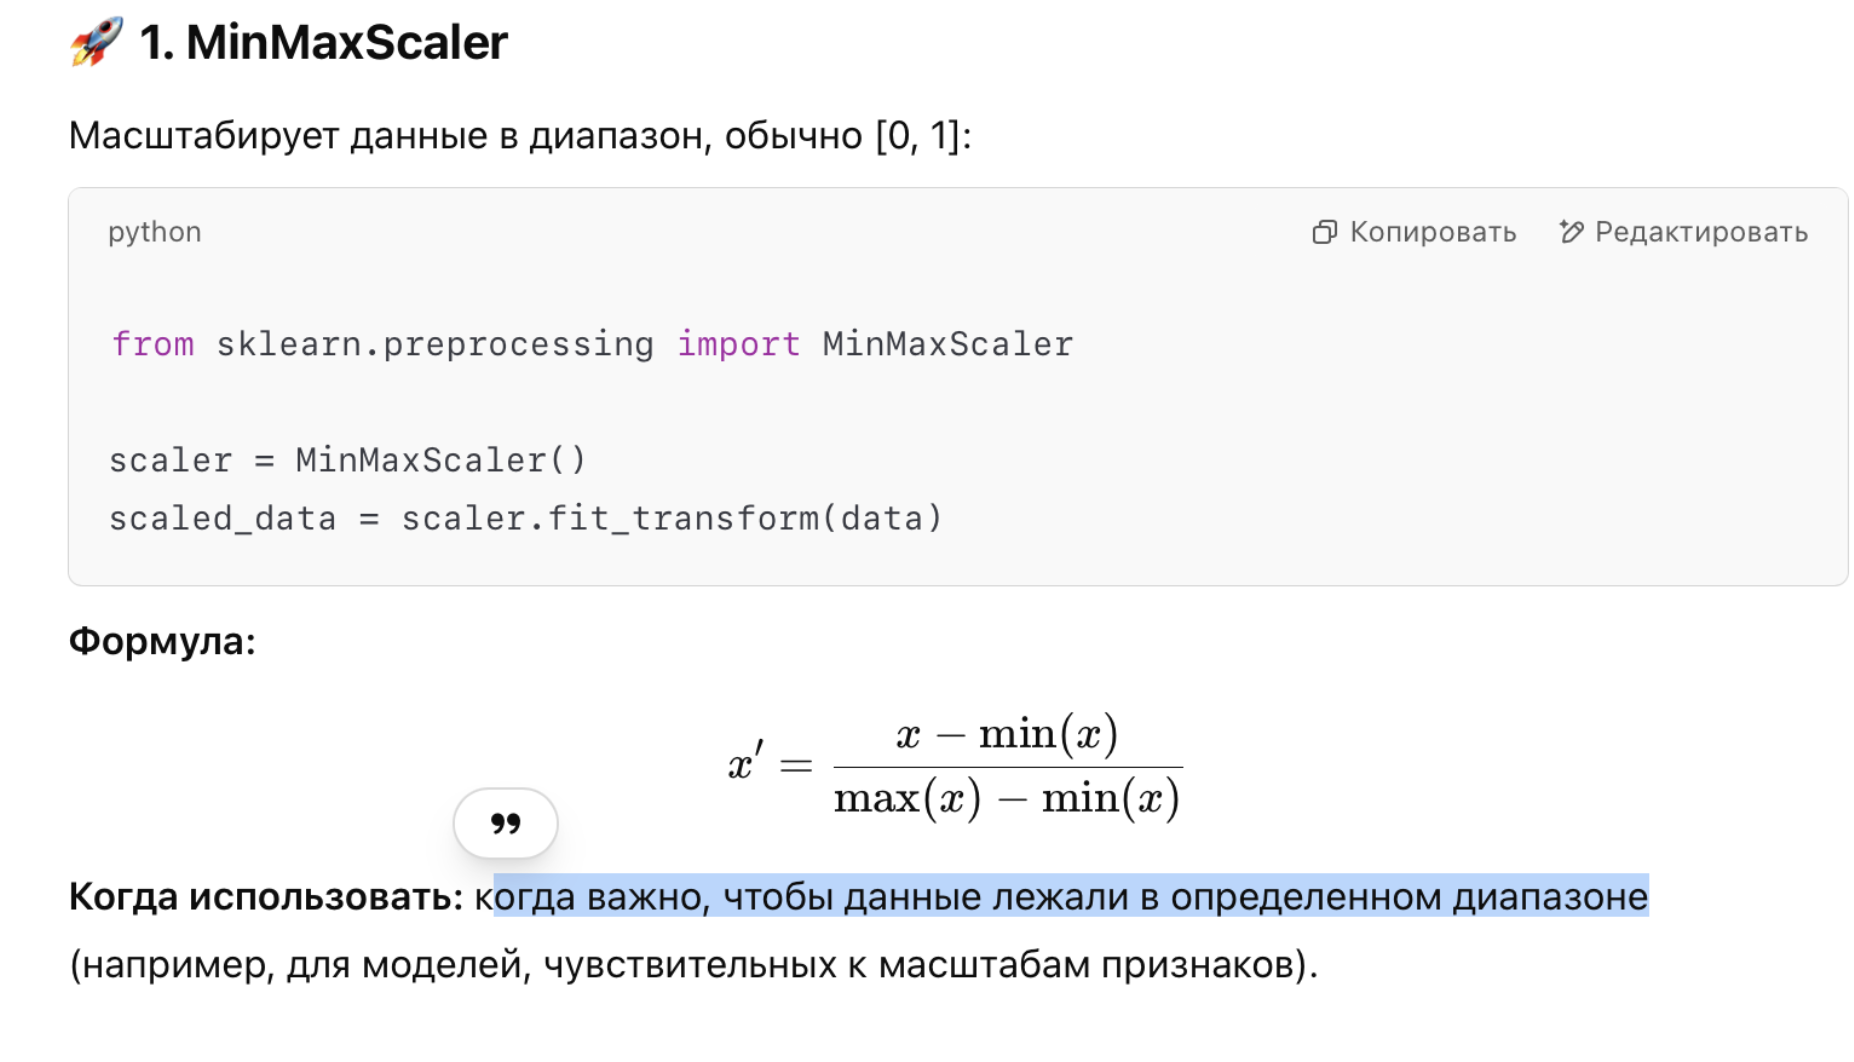

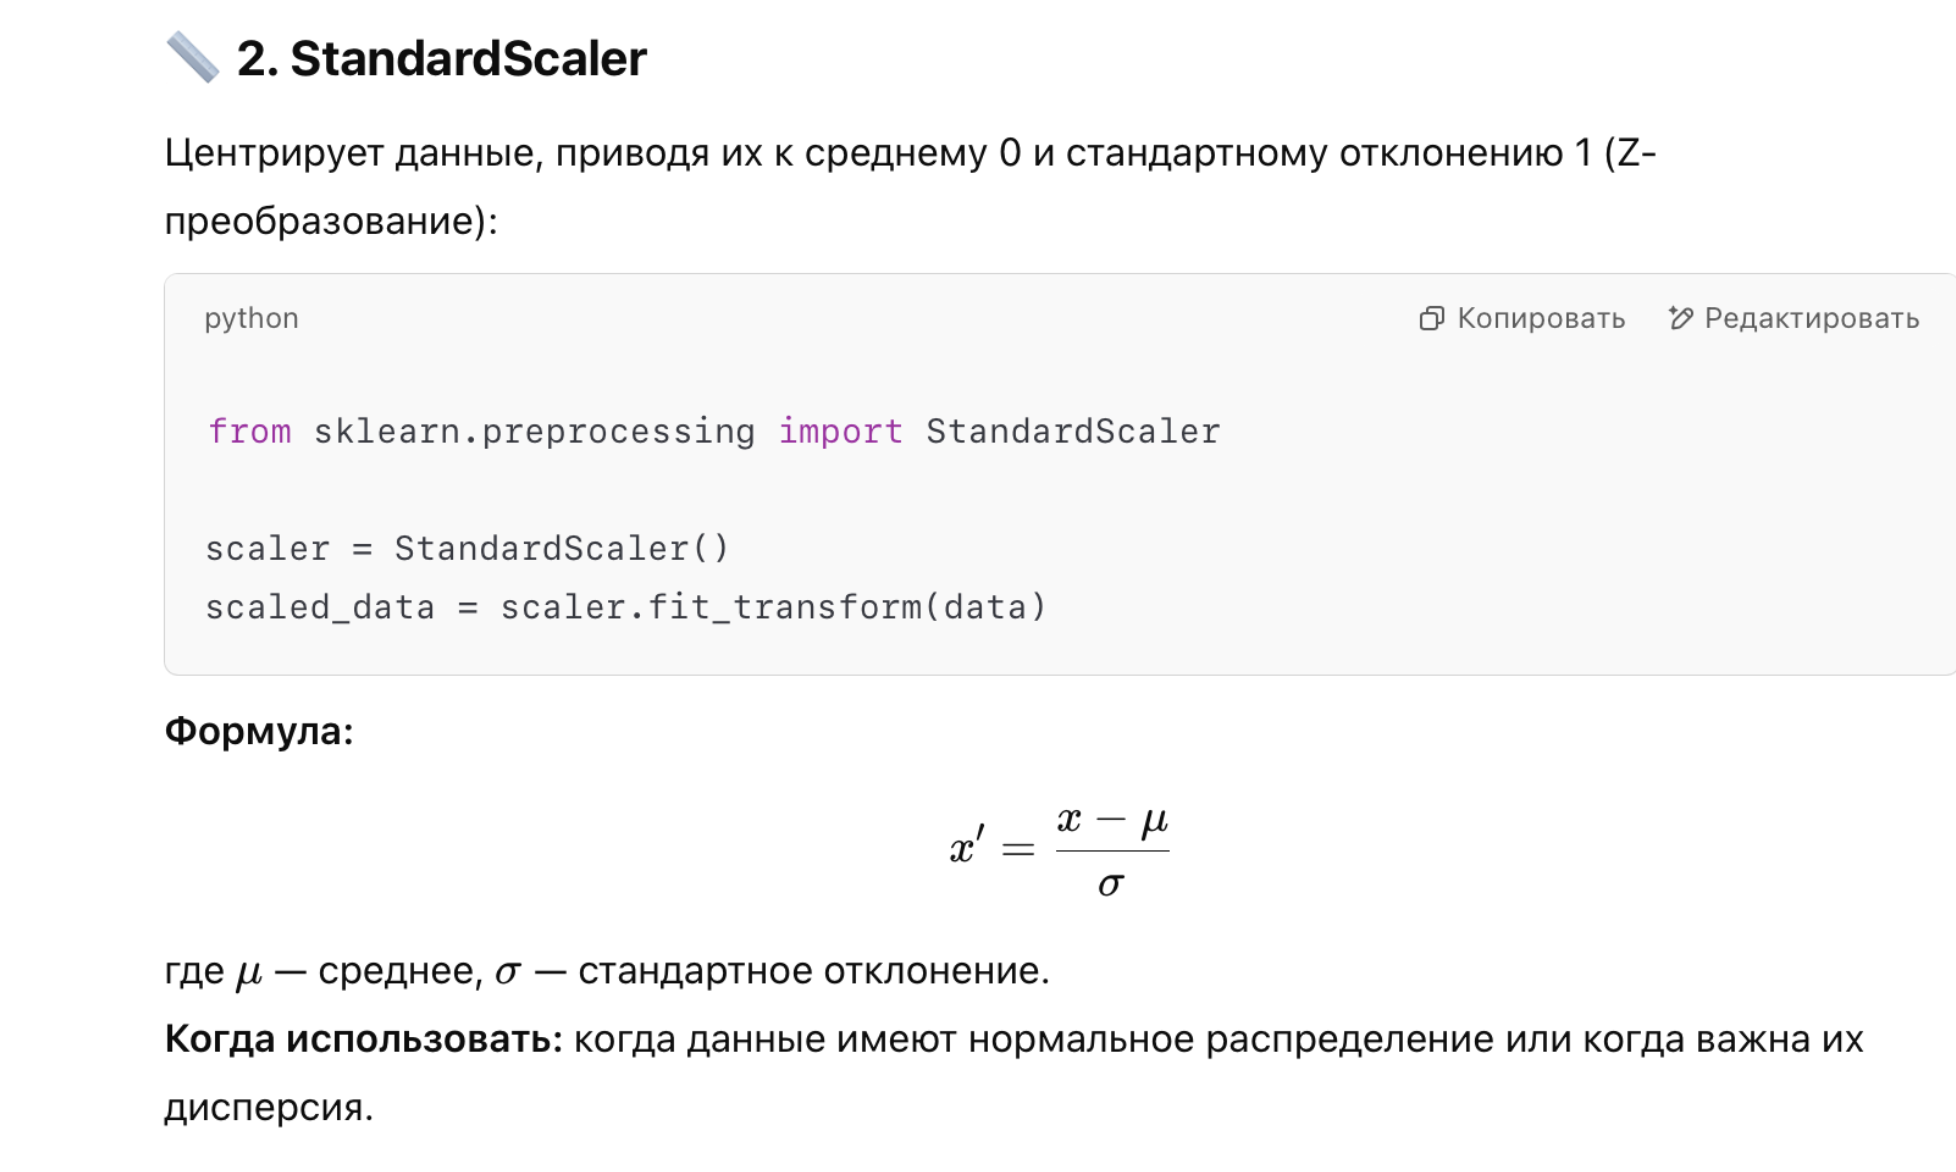

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_pol)
X_pol_transformed = scaler.transform(X_pol)

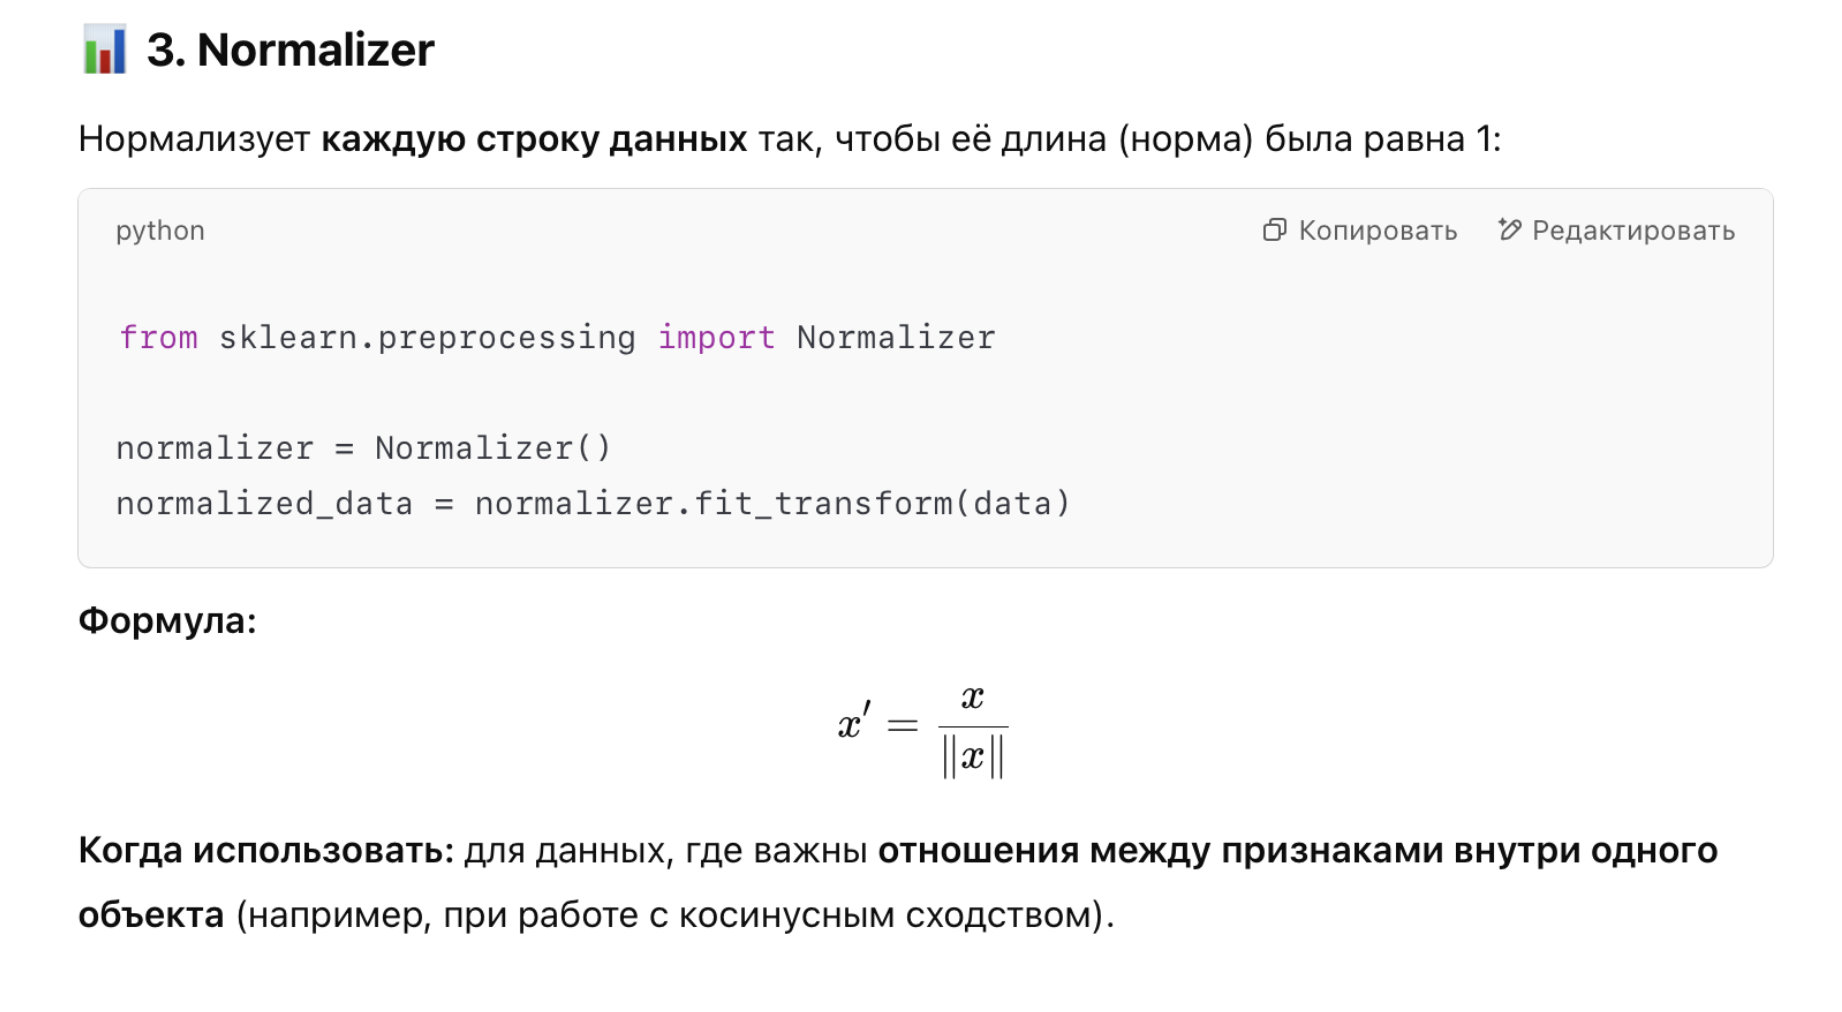

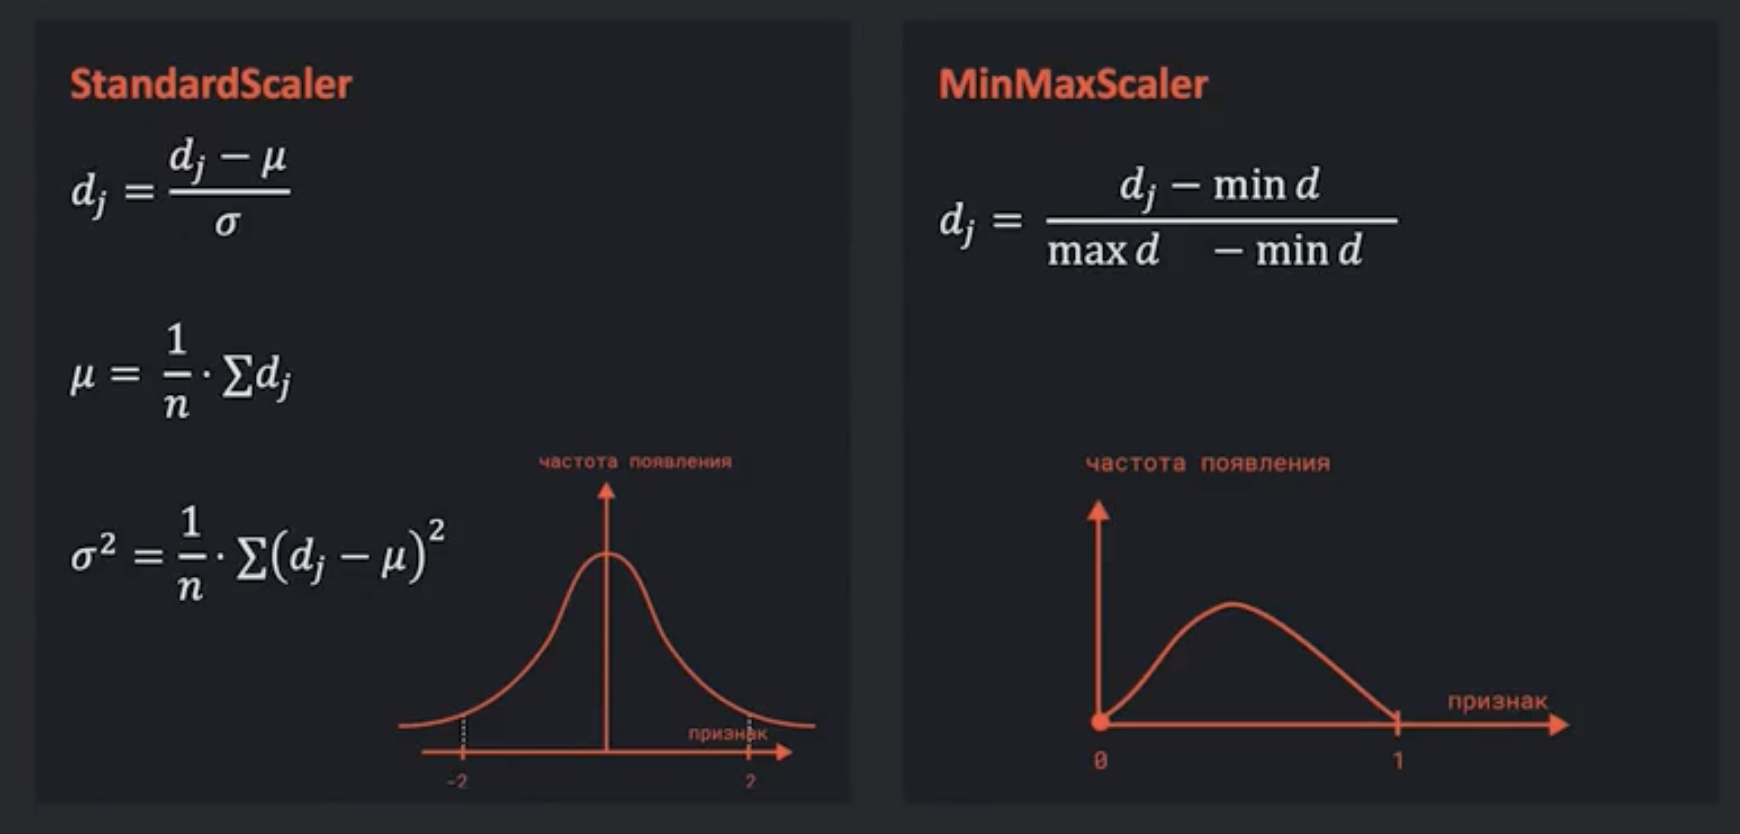

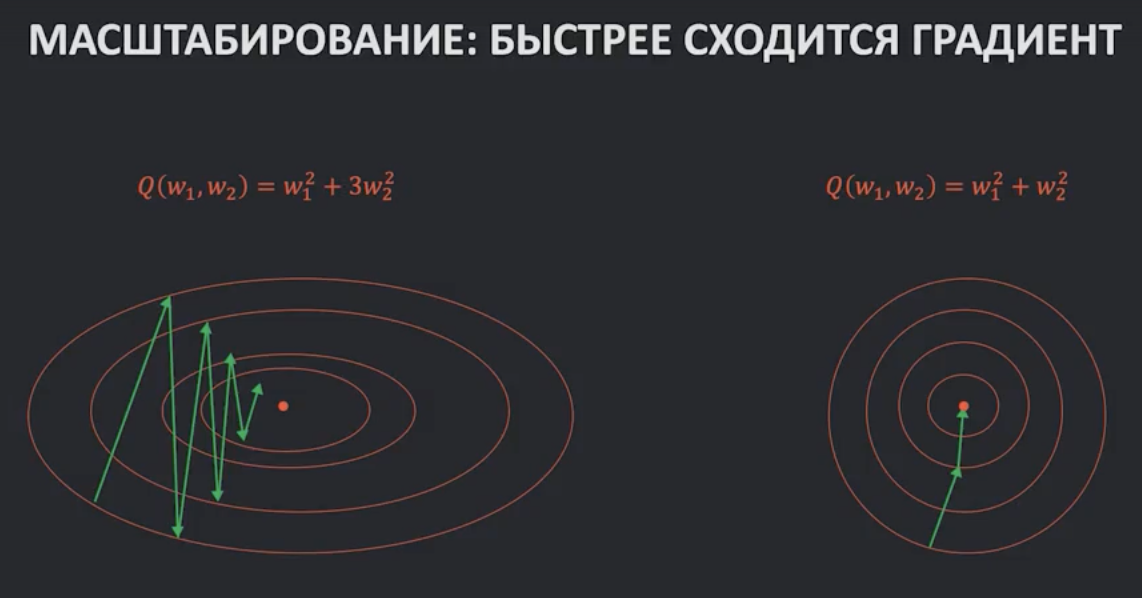

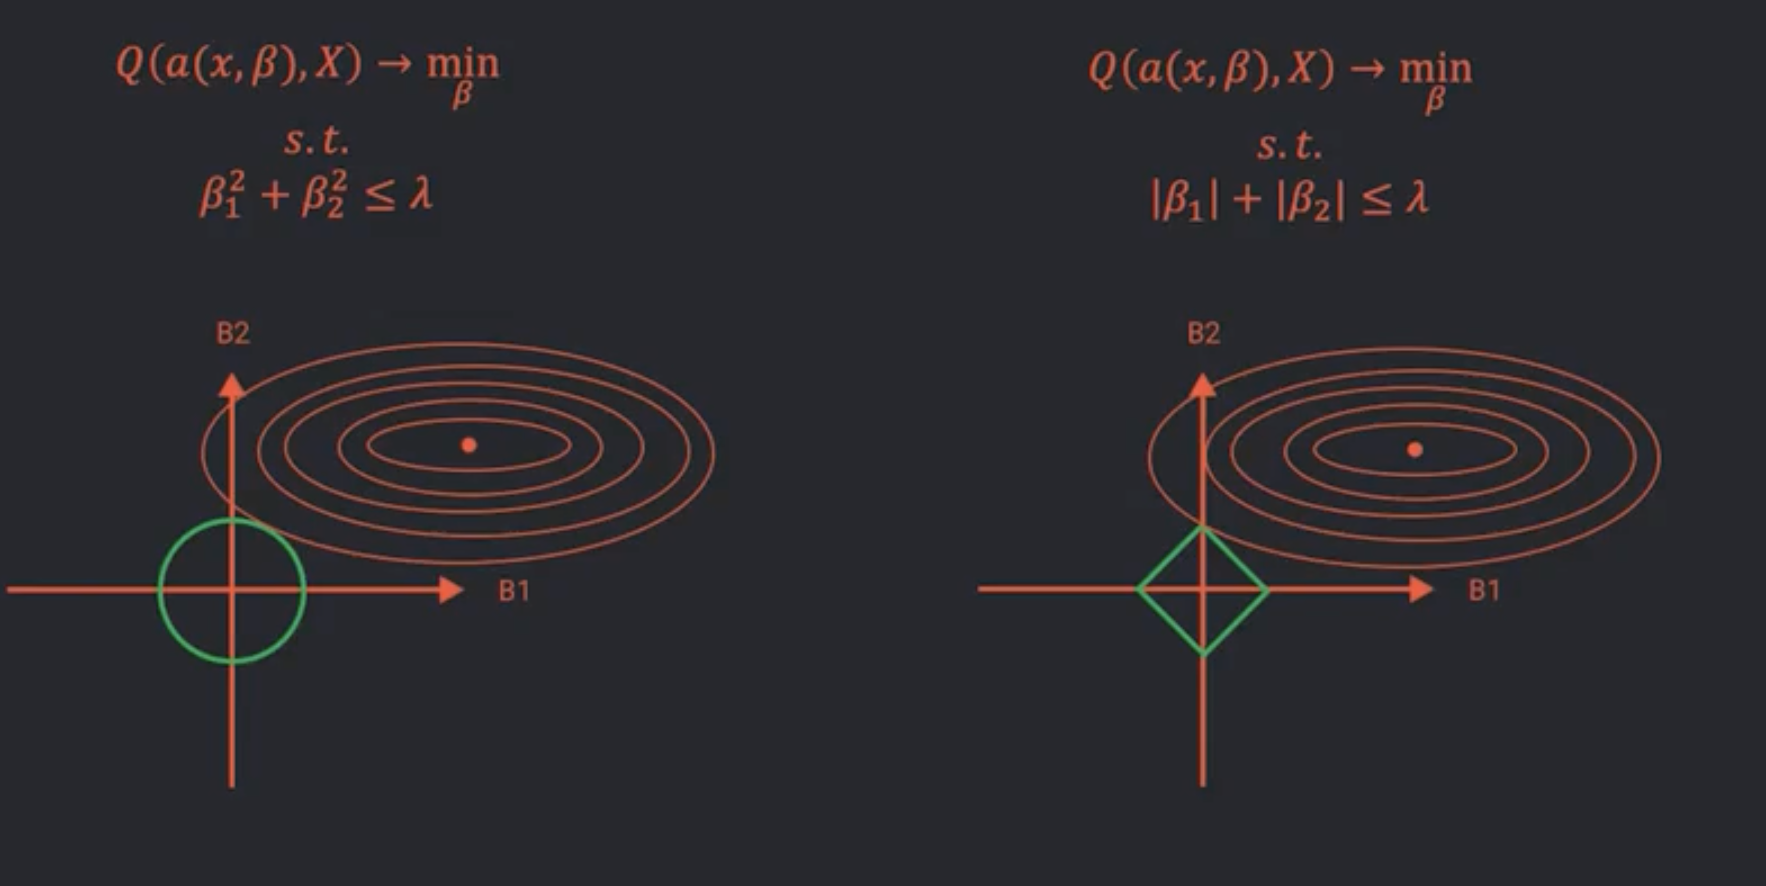


In [ ]:
### Как подобрать коэффициент регуляризации?

from sklearn.model_selection import GridSearchCV

# словарь параметр - значения для перебора
# alphas = np.linspace(start=0.01, stop=1, num=30)
param_grid = {
    "Lasso__alpha": alphas
}

### Передадим в GridSearchCV

search = GridSearchCV(pipe, param_grid, 
                      cv=splitter, scoring='neg_mean_squared_error')

search.fit(X, Y)

search.best_score_
search.best_params_

model.set_params(Lasso__alpha=search.best_params_['Lasso__alpha'])

## Мультиколлинеарность

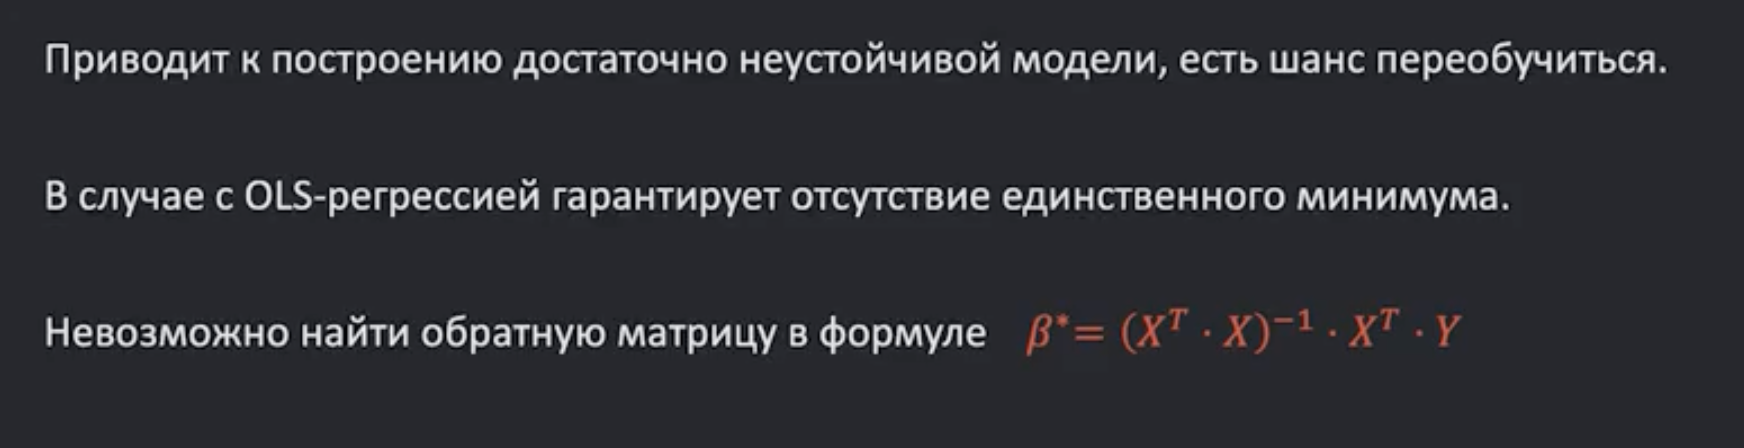

Регуляризация помогает бороться с мультиколлинеарностью

In [ ]:
df.corr()

In [ ]:
### Секретные функции для фильтрации признаков

def get_redundant_pairs(df):
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(df[numeric_columns], 50))

In [ ]:
### Сворованный со stackoverflow код
### Удалим колонки, где корреляция оказывается > 0.9

def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                if colname in dataset.columns:
                    del dataset[colname] # deleting the column from the dataset
    


In [ ]:
### Посмотрим на квазиконстантые признаки

from sklearn.feature_selection import VarianceThreshold

numeric_columns = df.select_dtypes(include=["int64", "float64"]).columns
cutter = VarianceThreshold(threshold=0.1)
cutter.fit(df[numeric_columns])
const_col = numeric_columns[~cutter.get_support()]

